In [1]:
import pynucastro as pyna

In [3]:
nuclei = ["n", "h1", "he4", "b11", "c12", "n13", "n14",
          "o16", "o17", "ne20", "ne22", "na23",
          "mg24", "mg25", "mg26", "al27", "si28", "si29",
          "si30", "p30", "p31", "s31", "s32", "cl35",
          "ar36", "ar37", "ar38", "ar39", "k39",
          "ca40", "sc43", "ti44", "v47", "cr48", "mn51",
          "fe52", "fe56", "co55", "ni56", "ni58", "ni59"]

In [4]:
len(nuclei)

41

In [5]:
rl = pyna.ReacLibLibrary()

In [6]:
lib1 = rl.linking_nuclei(nuclei)

In [7]:
len(lib1.get_rates())

186

In [8]:
tl = pyna.TabularLibrary(ordering=["ffn", "langanke"])

In [9]:
lib2 = tl.linking_nuclei(nuclei)

In [10]:
len(lib2.get_rates())

8

In [11]:
all_lib = lib1 + lib2

In [12]:
dupes = all_lib.find_duplicate_links()
dupes

[[n ⟶ p + e⁻ + 𝜈, n ⟶ p + e⁻ + 𝜈],
 [P30 ⟶ Si30 + e⁺ + 𝜈, P30 + e⁻ ⟶ Si30 + 𝜈],
 [S31 ⟶ P31 + e⁺ + 𝜈, S31 + e⁻ ⟶ P31 + 𝜈],
 [Ar39 ⟶ K39 + e⁻ + 𝜈, Ar39 ⟶ K39 + e⁻ + 𝜈]]

In [15]:
rates_to_remove = []
for d in dupes:
    for r in d:
        if isinstance(r, pyna.rates.ReacLibRate):
            rates_to_remove.append(r)

for r in rates_to_remove:
    all_lib.remove_rate(r)

In [16]:
len(all_lib.get_rates())

190

In [17]:
net = pyna.AmrexAstroCxxNetwork(libraries=[all_lib])

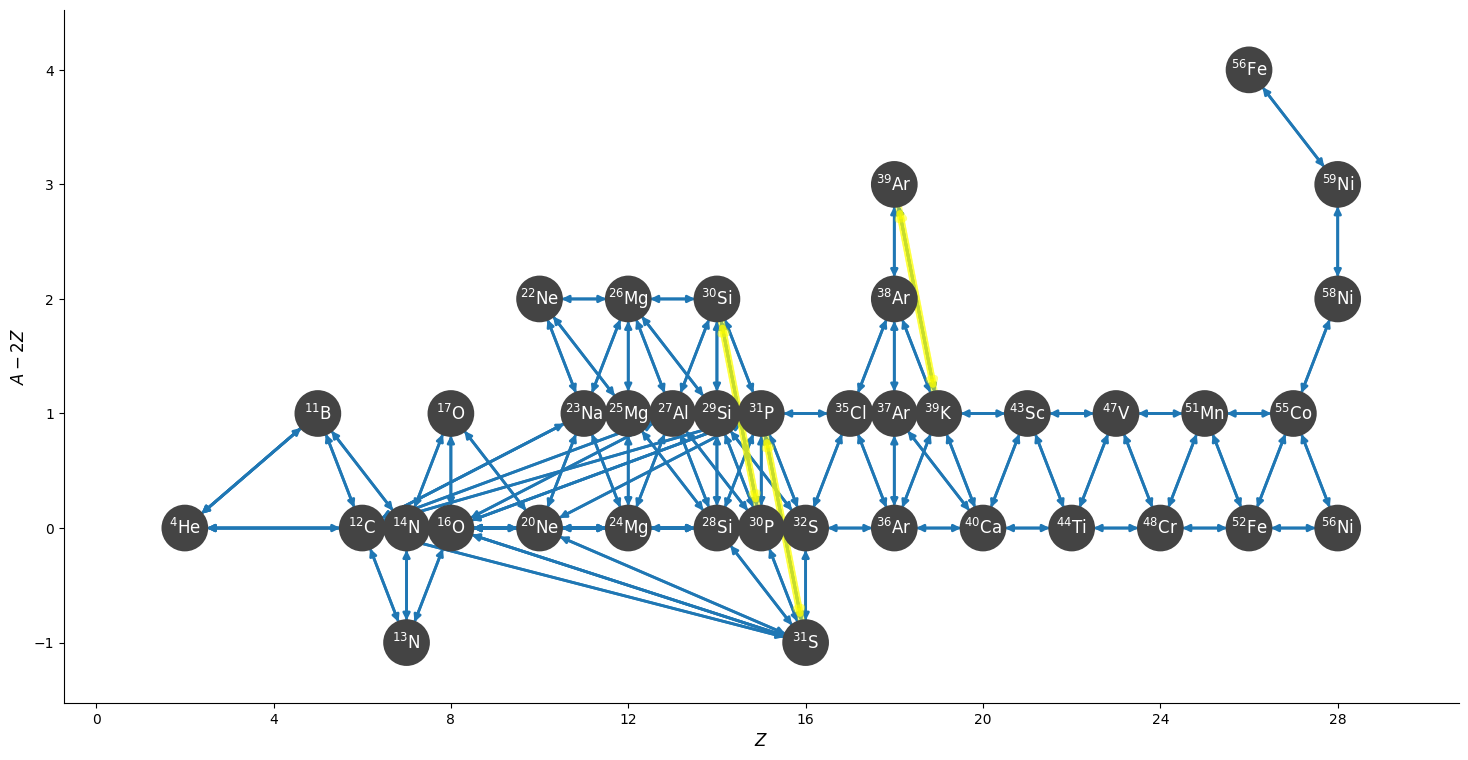

In [20]:
fig = net.plot(rotated=True, hide_xp=True, hide_xalpha=True,
               size=(1800, 900), highlight_filter_function=lambda r: isinstance(r, pyna.rates.TabularRate))

In [21]:
net.write_network()